# MSDM5004 Homework 5
------------------------------------------------------------------------

**1.** Write a program to:
1.  Evaluate the integral $$I=\int_0^2\sin^2\left[\frac{1}{x\left(2-x\right)}\right]dx$$ using the
    “hit-or-miss” Monte Carlo method with 10,000
    points. Also evaluate the error on your estimate. By "hit-or-miss" it means generating uniform points in the rectangle $\left[0,2\right]\times\left[0,1\right]$ and counting the fraction of points below the graph.

In [1]:
# answer
import numpy as np

def f(x):
    return np.sin(1/(x*(2-x)))**2

N = 10000
a = 0
b = 2
L = b - a
H = 1

x, y = L*np.random.rand(N) + a, H*np.random.rand(N)
r = sum(y<f(x))/N
print(f'Integral by Hit-or-Miss MC method = {r*L*H}')

sigma_hm = np.sqrt(r*(1-r)/N)
print(f'Error = {sigma_hm*L}')


Integral by Hit-or-Miss MC method = 1.4428
Error = 0.008966204102071287


2.  Now estimate the integral again using the standard mean value Monte Carlo integration method with
    10,000 points. Also evaluate the error.  
You should find that the error is somewhat smaller using the mean value
method.

In [2]:
# answer
x1 = L*np.random.rand(N) + a
mu = sum(f(x1))/N
print(f'Integral by mean value MC integration method: {mu*L}')

sigma_mv = np.sqrt((sum(f(x1)**2)/N-mu**2)/(N-1))
print(f'Error = {sigma_mv*L}')

Integral by mean value MC integration method: 1.4515689673833112
Error = 0.005305065113530181


**2.** Construct a general proof that the mean value method
always does better, or at least no worse, than the “hit-or-miss” method, as follows.

1.  For an integral $I=\int_a^bf\left(x\right)dx$ with $f(x)\ge0$ everywhere in
    the domain of integration, show that the area under the graph estimated by the "hit-or-miss" method can be rewritten as
    $$I \simeq (b-a) H\langle s\rangle,$$ where $H$ is the vertical
    height of the box enclosing the function to be integrated (so that
    the box’s area is $A=(b-a)H$) and $\langle s\rangle$ is the average
    of variables $s_i$ defined such that $s_i=1$ if the $i$th point in
    the Monte Carlo procedure was a “hit” (it fell below the curve
    of $f(x)$) and $s_i=0$ if it was a “miss.” Hence argue that the
    hit-or-miss method will never be more accurate than the mean value
    method if the variance of $f$ satisfies
    $\mathrm{var}(f) \le H^2\mathrm{var}(s)$.

`# answer`

Area under the curve / Area of the box = Probability of a random point falling below the curve, which could be estimated by the percentage of random points falling below the curve

i.e.  $\frac{I}{(b-a)H} \simeq \frac{N'}{N} = \langle s\rangle $, where N' = number of points falling under the curve and N = Total number of points

Hence, $I \simeq (b-a) H\langle s\rangle$

The integral estimated by mean value method is denoted by $I_{mv}\simeq (b-a) \langle f\rangle$

we have, $\mathrm{var}(I_{mv})\simeq \mathrm{var}((b-a) \langle f\rangle)=(b-a)^{2}\mathrm{var}(\langle f\rangle)=\frac{(b-a)^{2}}{N}\mathrm{var}(f)\le\frac{(b-a)^{2}}{N}H^{2}\mathrm{var}(s)=(b-a)^{2}H^{2}\mathrm{var}(\langle s\rangle)=\mathrm{var}((b-a) H\langle s\rangle)\simeq \mathrm{var}(I_{hm})$

Thus, the hit-or-miss method will never be more accurate than the mean value method if the variance of $f$ satisfies $\mathrm{var}(f) \le H^2\mathrm{var}(s)$.

2.  Show that the variance of a single variable $s_i$ is
    $\mathrm{var}(s) =
      p(1-p)$, where $p=I/A$. Show further that
    $p=\langle f\rangle/H$ and
    $H^2\mathrm{var}(s) = \langle f\rangle(H-\langle f\rangle)$
    and thus that the hit-or-miss method will never be the more accurate
    method if $\langle f(f-H)\rangle\le0$. Given that the value of
    $f(x)$ never falls outside the interval from 0 to $H$, prove that
    this last condition is always true.

`# answer`

$s_{i}=1$ if $y_{i}\lt f(x_{i})$ and $s_{i}=0$ otherwise,

$\mathrm{E}(s)=1\times P(y_{i}\lt f(x_{i}))+0\times P(y_{i}\ge f(x_{i}))=P(y_{i}\lt f(x_{i}))=I/A=p$

$\mathrm{E}(s^{2})=1^{2}\times P(y_{i}\lt f(x_{i}))+0^{2}\times P(y_{i}\ge f(x_{i}))=P(y_{i}\lt f(x_{i}))=I/A=p$

$\implies \mathrm{var}(s) = \mathrm{E}(s^{2}) - (\mathrm{E}(s))^{2}=p-p^{2}=p(1-p)$

$p=I/A=\frac {I}{(b-a)H}=\langle f\rangle/H$

$H^2\mathrm{var}(s)=H^{2}p(1-p)=H^{2}(\frac{\langle f\rangle}{H})(1-\frac{\langle f\rangle}{H})=\langle f\rangle(H-\langle f\rangle)$

$\langle f(f-H)\rangle\le0 \implies \langle f^{2}\rangle\le \langle fH\rangle $

we have $H^2\mathrm{var}(s)=\langle f\rangle(H-\langle f\rangle)=\langle fH\rangle-(\langle f\rangle)^{2}\ge\langle f^{2}\rangle-(\langle f\rangle)^{2}=\mathrm{var}(f)$

From the result in 2.1, the hit-or-miss method will never be the more accurate method if $\langle f(f-H)\rangle\le0$.

Since $0\le f\le H$, we have $f\ge 0$ and $f-H\le0$. Hence, $\langle f(f-H)\rangle\le0$ always hold which implies that the hit-or-miss method will never be the more accurate method than the mean value method.

The hit-or-miss method can be extended to the case where $f(x)$ is not
always positive by adding a constant onto $f(x)$ large enough to make it
always positive, calculating the integral of the resulting function,
then subtracting the constant again at the end. The proof above can be
extended to this case by noting that the variance of $f$ is unaffected
by additive constants, and hence the mean value method is always the
more accurate of the two integration methods for any function, positive
or not.

**3.** Consider the function $f(x) = x^2 -
\cos (4\pi x)$. Clearly the global minimum of this function is at $x=0$.

1.  Write a program to confirm this fact using simulated annealing
    starting at, say, $x=2$, with Monte Carlo moves of the form $x\to
      x+\delta$ where $\delta$ is a random number drawn from a Gaussian
    distribution with mean zero and standard deviation one.
    Use an exponential cooling schedule and adjust the start
    and end temperatures, as well as the exponential constant, until you
    find values that give good answers in reasonable time. Have your
    program make a plot of the values of $x$ as a function of time
    during the run and have it print out the final value of $x$ at the
    end. You will find the plot easier to interpret if you make it using
    dots rather than lines, with a statement of the form `plot(x,".")`
    or similar.

Final x=0.0011346766633519093
Best x=-0.000523022662255029 with f(x)=-0.9999781276691785


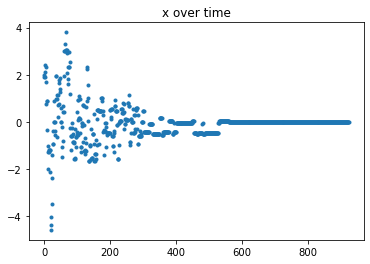

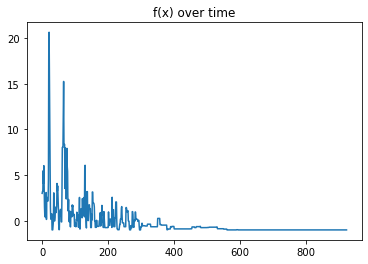

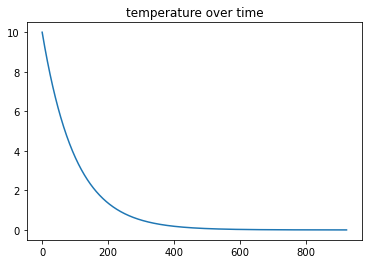

In [3]:
# answer
import numpy as np
def f(x):
    return x**2-np.cos(4*np.pi*x)

def sa(objective,x,T0,T1,tau,max_iteration,lower=-np.inf,upper=np.inf):
    from numpy.random import rand, randn
    from numpy import exp
    import matplotlib.pyplot as plt
    c = 0
    temp = T0
    T = [temp]
    E = [objective(x[0])]
    best_x = x[0]
    best_E = E[0]
    while temp>T1 and c<max_iteration:
        c+=1
        temp=T0*exp(-c/tau)
        T.append(temp)
        x_old = x[-1]
        E_old = objective(x_old)
        x_new = x[-1]+randn()
        while x_new < lower or x_new > upper:
            x_new = x[-1]+randn()
        E_new = objective(x_new)
        if E_new < best_E:
            best_x = x_new
            best_E = E_new
            x.append(x_new)
            E.append(E_new)
        elif E_new < E_old:
            x.append(x_new)
            E.append(E_new)
        elif rand() < exp(-(E_new-E_old)/temp):
            x.append(x_new)
            E.append(E_new)
        else:
            x.append(x_old)
            E.append(E_old)
    print(f"Final x={x[-1]}")
    print(f'Best x={best_x} with f(x)={best_E}')
    plt.plot(x,".")
    plt.title('x over time')
    plt.figure()
    plt.plot(E)
    plt.title('f(x) over time')
    plt.figure()
    plt.plot(T)
    plt.title('temperature over time')    

                
sa(f,[2],10,0.001,100,1000)

2.  Now adapt your program to find the minimum of the more complicated
    function $f(x) = \cos x + \cos (\sqrt2x) + \cos (\sqrt3 x)$ in the range
    $0<x<50$.

    Hint: The correct answer is around $x=16$, but there are
    also competing minima around $x=2$ and $x=42$ that your program might
    find. In real-world situations, it is often good enough to find any
    reasonable solution to a problem, not necessarily the absolute best, so
    the fact that the program sometimes settles on these other solutions is
    not necessarily a bad thing.

Final x=15.972777199000255
Best x=15.953960821080651 with f(x)=-2.6125105180564043


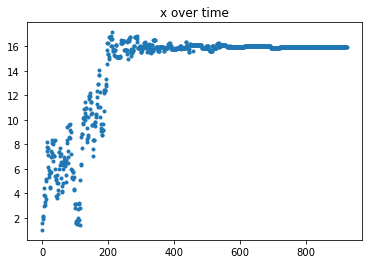

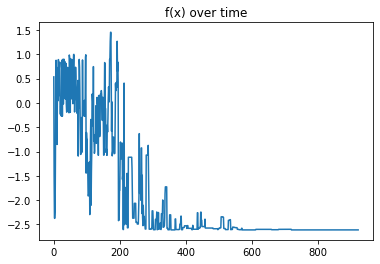

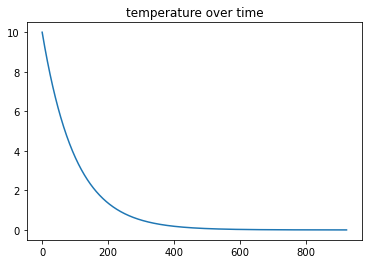

In [7]:
# answer
def f1(x):
    from numpy import cos, sqrt
    return cos(x)+cos(sqrt(2)*x)+cos(sqrt(3)*x)

sa(f1,[1],10,0.001,100,1000,lower=0,upper=50)